In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas
import scipy
from scipy import io
from scipy import stats
from datetime import datetime
from pyqtgraph.Qt import QtGui, QtCore
import pyqtgraph as pg
from lab8_common import *

In [2]:
data = io.loadmat('data/sensors.mat')['sonars']
true = io.loadmat('data/sensors.mat')['true_states']
print data.shape
print true.shape
steps = true.shape[1]
feats = true.shape[0]
room = create_map()

(11, 225)
(3, 225)


In [11]:
def add_noise(arr):
    sig = 0.01
    arr[0] = np.random.normal(arr[0], scale=sig, size=arr.shape[1])
    arr[1] = np.random.normal(arr[1], scale=sig, size=arr.shape[1])
    arr[2] = 2*math.pi * np.random.rand(arr.shape[1])
    return arr

def gaus_lik(y, z):
    sig = 0.1
    return math.pow(2 * math.pi * math.pow(sig, 2), -z.shape[0]) * np.exp( -0.5 * np.sum(np.power(y - z, 2), axis=0, keepdims=True) / math.pow(sig, 2) )

def lap_lik(y, z):
    sig = 50
    return np.exp( -sig * np.sum( np.abs(y - z), axis=0, keepdims=True ) )

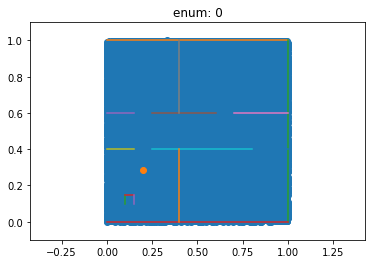

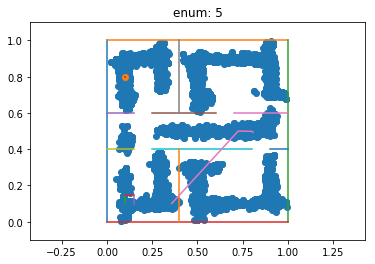

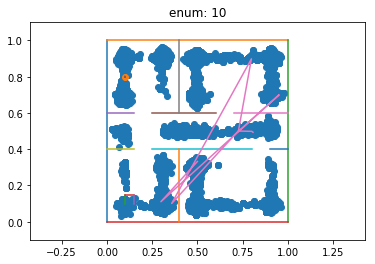

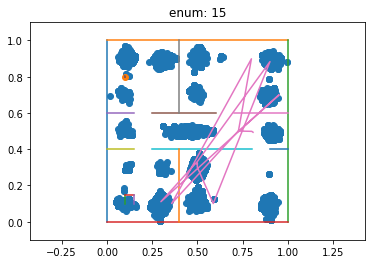

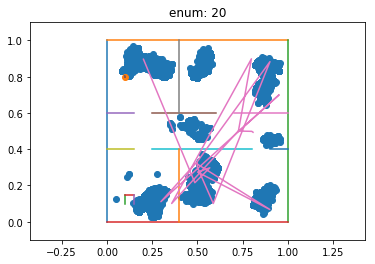

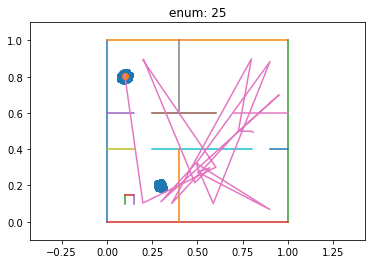

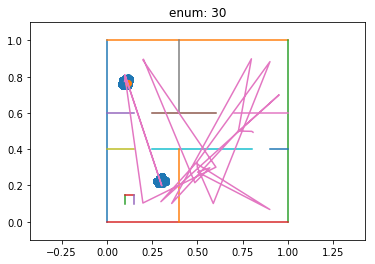

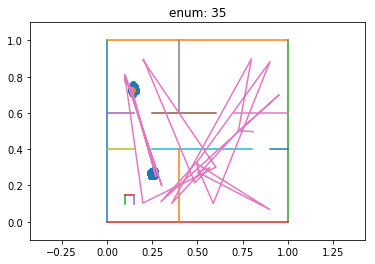

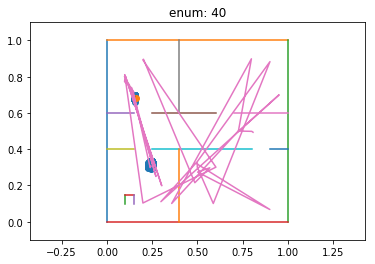

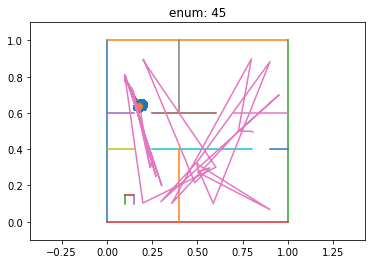

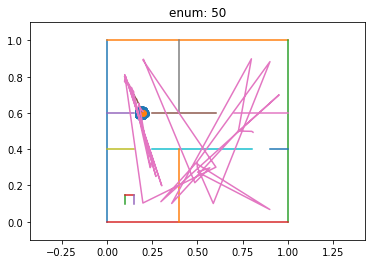

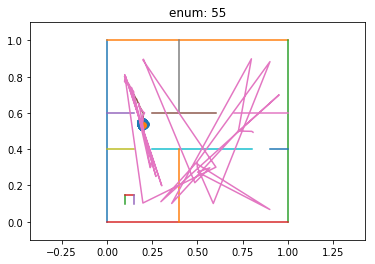

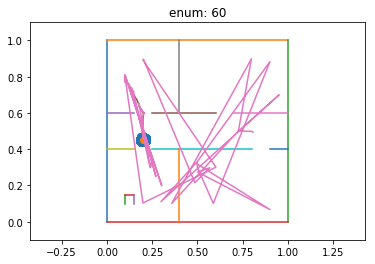

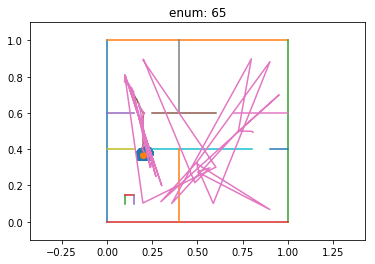

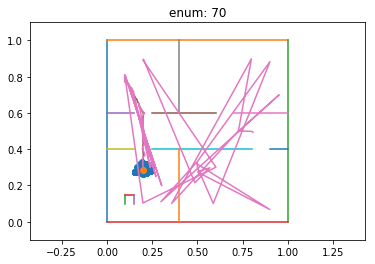

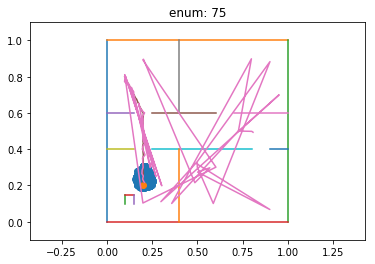

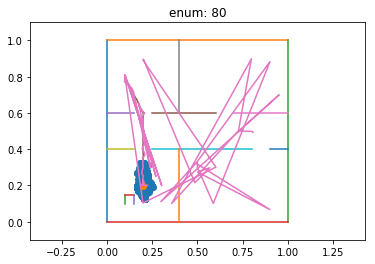

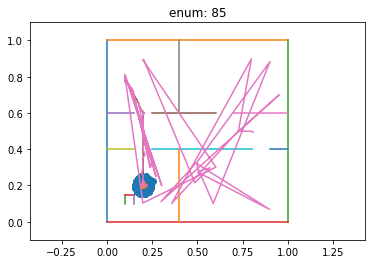

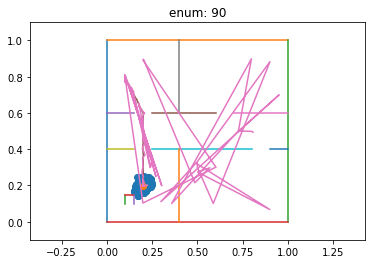

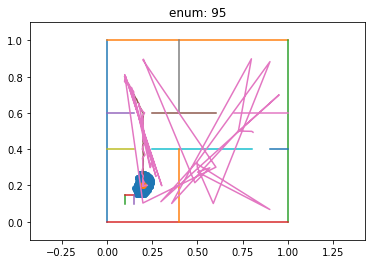

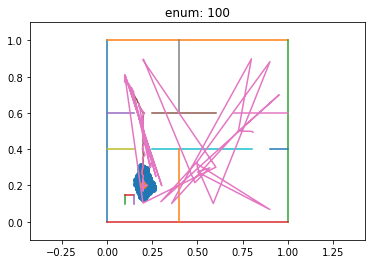

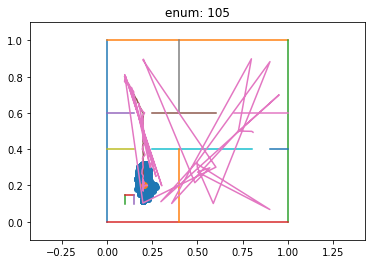

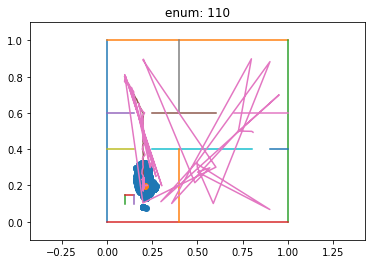

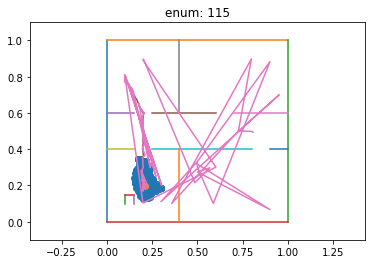

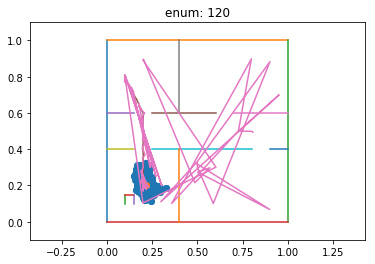

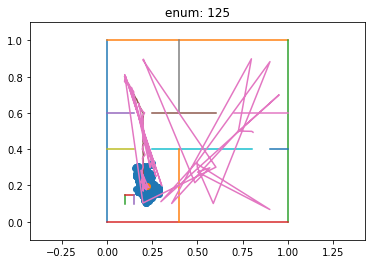

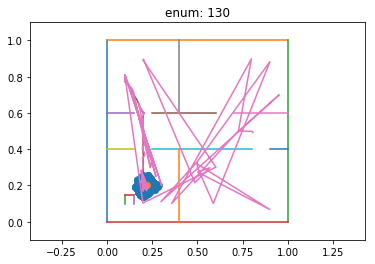

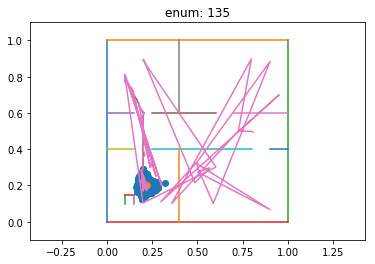

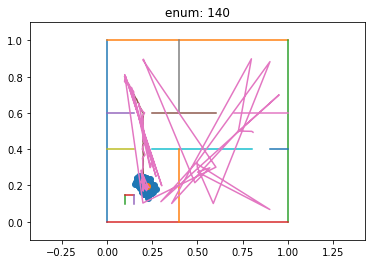

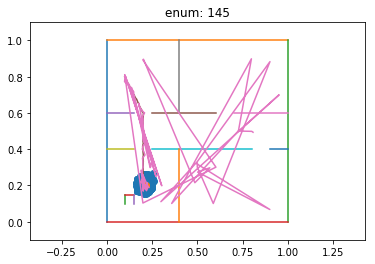

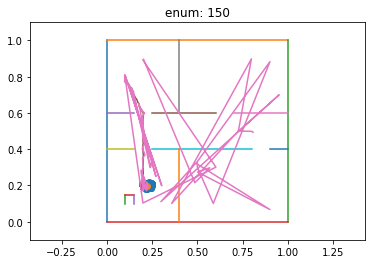

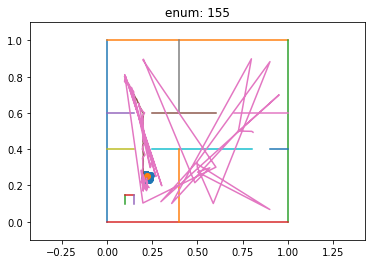

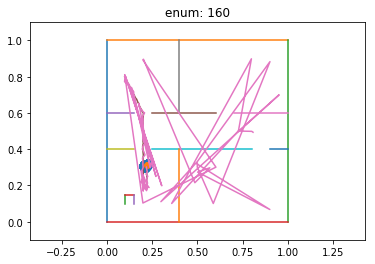

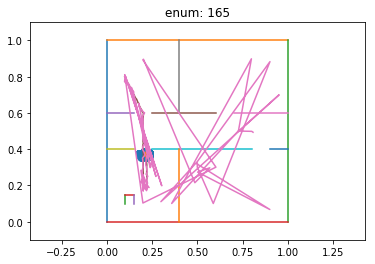

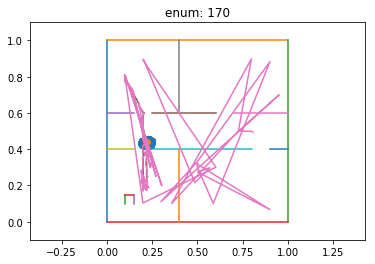

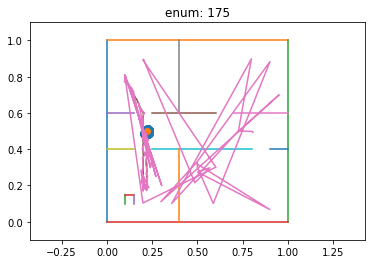

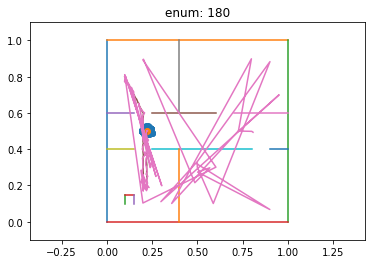

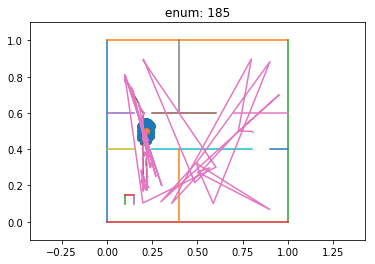

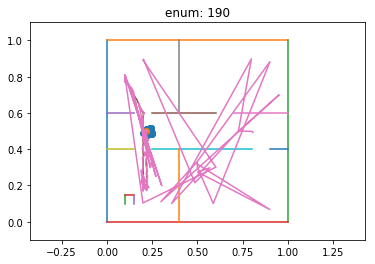

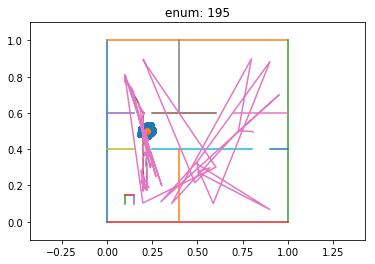

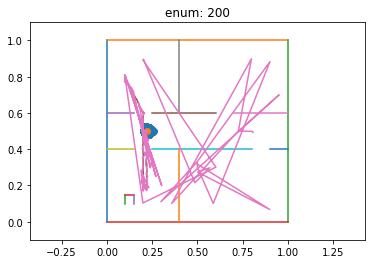

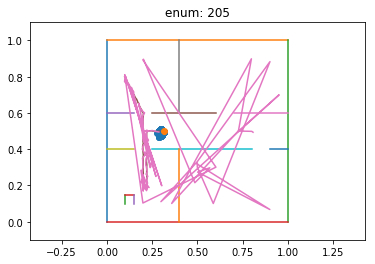

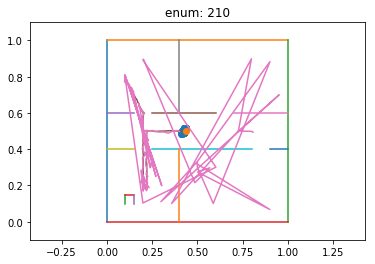

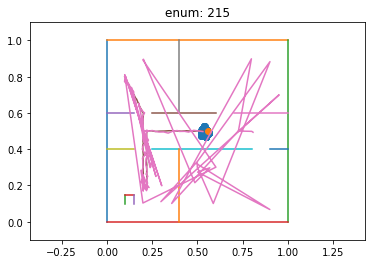

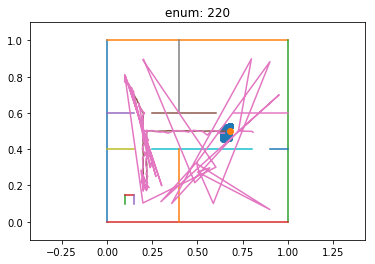

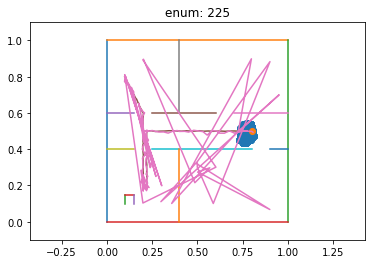

In [26]:
num_parts = 50000
parts = np.random.rand(feats, num_parts)
show_map( room )
plt.scatter(parts[0], parts[1])
plt.scatter(true[0,enum], true[1,enum])
plt.title('enum: 0')
plt.show()

exp = 0
exps = np.zeros((steps, 2), dtype=float)
for enum in range(steps):
    parts = add_noise(parts)
    weights = (1/float(num_parts)) * lap_lik(data[:,enum:enum+1], cast_rays(parts, room).T)
    weights /= np.sum(weights)
    exp = np.argmax(weights[0])
    exps[enum] += parts[:2, exp]
    indc = np.random.choice(range(num_parts), size=num_parts, p=weights[0])
    parts = parts[:,indc]
    if (enum+1) % 5 == 0:
        show_map( room )
        plt.scatter(parts[0], parts[1])
        plt.scatter(true[0,enum], true[1,enum])
        plt.plot(true[0,:enum], true[1,:enum])
        plt.plot(exps[:enum,0], exps[:enum,1])
        plt.title('enum: ' + str(enum+1))
        plt.show()